#**Projeto 1**

**Projeto 1 - IBM - RH - Análise de desempenho e atritos de funcionários**

* Entrega:
* O projeto deve ser entregue até a terça-feira da 2ª semana de aula, envie o link do GitHub ou HTML na atividade no Moodle.
* O prazo máximo é quarta-feira da 2ª semana de aula, valendo 20% a menos da nota.

* Dados do Certificado
  - Linguagem: Python
  - Tecnologias: Pandas, Numpy, Seaborn, Matplotlib e Sklearn
  -  Carga horária: 20 horas

* IBM HR Analytics Employee Attrition & Performance - Kaggle
  * Este conjunto de dados foi criado pela equipe de cientistas de dados da IBM com o objetivo de ser usado de maneira educacional. Iremos criar uma variável chamada de turnover (rotatividade) para ser usada como variável dependente. Esta variável demonstra que o funcionário poderá sair da empresa.

* Os principais pontos que serão avaliados:
  - Levantamento de hipóteses
  - Manipulação de dados e criação de gráficos simples com o Pandas
  - Criar um modelo de classificação

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score,recall_score

#Preparação do ambiente
Vamos fazer o download do dataset em questão, aplicar ele a uma variável e analisar os dados que iremos trabalhar neste projeto

In [ ]:
dados = pd.read_csv('Employee-Attrition.csv')

In [ ]:
dados.shape

(1470, 35)

In [ ]:
dados.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
dados['turnover'] = dados['Attrition'].map({'Yes':1, 'No': 0})

In [ ]:
dados.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- Em uma breve introdução, podemos ver que se trata de um dataset com 34 variáveis e um target, a variável alvo, o qual demonstra se o funcionário poderá ou não sair da empresa.
- Não foi constatado nenhum valor nulo em nossa base de dados e também podemos ver que temos variáveis de classificação e variáveis numéricas, teremos que trabalhar em cima destes dados para poder gerar um modelo.

##Tratando os dados

- Como visto logo acima, foi constatado que temos variáveis categóricas em nossa base, então vamos olhar elas mais de perto, verificar a necessidade de transformar em variáveis Dummies.
- As variáveis Dummies tem a função de transformar variáveis categóricas em variáveis numéricas, cada categoria é transforada e uma coluna, e neste caso quando aquele funcionário se encaixar em determidada categoria será aplicado o valor "1", e quando não, o valor "0". 

In [ ]:
def info_objects(coluna_dados):
  print(coluna_dados + ": ")
  print(dados[coluna_dados].unique())
  print(dados[coluna_dados].describe())

In [ ]:
#Tranforma variávies em Dummies
def tranf_getdummies(coluna_dados):
  var_getdummies = dados[coluna_dados]
  var_getdummies  = pd.get_dummies(var_getdummies)
  for i in range(len(dados[coluna_dados].unique())):
    dados[dados[coluna_dados].unique()[i]] =  var_getdummies[dados[coluna_dados].unique()[i]]

**BusinessTravel**

In [ ]:
info_objects('BusinessTravel')

BusinessTravel: 
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
count              1470
unique                3
top       Travel_Rarely
freq               1043
Name: BusinessTravel, dtype: object


In [ ]:
tranf_getdummies('BusinessTravel')

Department

In [ ]:
info_objects('Department')

Department: 
['Sales' 'Research & Development' 'Human Resources']
count                       1470
unique                         3
top       Research & Development
freq                         961
Name: Department, dtype: object


In [ ]:
tranf_getdummies('Department')

EducationField

In [ ]:
info_objects('EducationField')

EducationField: 
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object


In [ ]:
tranf_getdummies('EducationField')

Gender

In [ ]:
info_objects('Gender')

Gender: 
['Female' 'Male']
count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object


In [ ]:
tranf_getdummies('Gender')

JobRole

In [ ]:
info_objects('JobRole')

JobRole: 
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
count                1470
unique                  9
top       Sales Executive
freq                  326
Name: JobRole, dtype: object


In [ ]:
tranf_getdummies('JobRole')

MaritalStatus

In [ ]:
info_objects('MaritalStatus')

MaritalStatus: 
['Single' 'Married' 'Divorced']
count        1470
unique          3
top       Married
freq          673
Name: MaritalStatus, dtype: object


In [ ]:
tranf_getdummies('MaritalStatus')

Over18

In [ ]:
info_objects('Over18')

Over18: 
['Y']
count     1470
unique       1
top          Y
freq      1470
Name: Over18, dtype: object


Esta variável não faz sentido mantermos em nosso dataset, a coluna tem apenas um valor.

In [ ]:
dados = dados.drop(['Over18'], axis=1)

OverTime

In [ ]:
info_objects('OverTime')

OverTime: 
['Yes' 'No']
count     1470
unique       2
top         No
freq      1054
Name: OverTime, dtype: object


In [ ]:
tranf_getdummies('OverTime')

In [ ]:
dados.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Manufacturing Director,Healthcare Representative,Manager,Sales Representative,Research Director,Single,Married,Divorced,Yes,No
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,0,0,0,0,1,0,0,1,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,0,0,0,0,1,0,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,0,1,0,0,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,0,0,0,0,0,1,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,0,0,0,0,0,0,1,0,0,1


Acabamos aumentando nossa base de dados para 61 colunas, porém, serão retiradas da base todas as colunas que foram transformadas.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1470 non-null   int64 
 1   Attrition                  1470 non-null   object
 2   BusinessTravel             1470 non-null   object
 3   DailyRate                  1470 non-null   int64 
 4   Department                 1470 non-null   object
 5   DistanceFromHome           1470 non-null   int64 
 6   Education                  1470 non-null   int64 
 7   EducationField             1470 non-null   object
 8   EmployeeCount              1470 non-null   int64 
 9   EmployeeNumber             1470 non-null   int64 
 10  EnvironmentSatisfaction    1470 non-null   int64 
 11  Gender                     1470 non-null   object
 12  HourlyRate                 1470 non-null   int64 
 13  JobInvolvement             1470 non-null   int64 
 14  JobLevel

#Exercicio 1. (2 pontos)
- Realize uma análise sobre as variáveis independentes em relação a variável turnover. Quais ideias você obteve? Faça uma pequena apresentação de três a quatro gráficos e escreva suas percepções abaixo de cada um.

- Vamos começar o entendimento do dataset através da quantidade de empregados classificados na coluna "turnover" como 1(sim) e como 0(não), onde o 1 representa as possíveis saídas da empresa e 0 os funcionários que no momento não apresentam características que deixariam a empresa.

In [ ]:
graf_turnover = dados['turnover'].value_counts()

In [ ]:
graf_turnover

0    1233
1     237
Name: turnover, dtype: int64

Text(0.5, 1.0, 'Possíveis Saídas de Empregados')

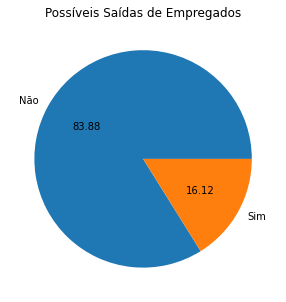

In [ ]:
graf_turnover = dados['turnover'].value_counts()

plt.figure(figsize=(12,5))

plt.pie(graf_turnover,labels=['Não','Sim'], autopct='%.2f') 
plt.title('Possíveis Saídas de Empregados', fontsize=12) 

- Como podemos ver, temos quase 84% dos funcionários classificados como "0"(não), que no momento não tem previsão de sair da empresa, porém, temos em torno de 16% de funcionários que a previsão é que deixem a empresa a qualquer momento.

- Importante ressaltar que estes números sozinhos não nos trazem nenhuma análise profunda, porem estes nos trazem alguns questionamentos.

1. Dentre estes 16%, quais deles tem bastante tempo de empresa?
2. Qual a classificação dos funcionários que tem os salários mais altos, pretendem ou não sair da empresa.
3. Temos uma coluna chamada satisfação do funcionário em trabalhar na empresa, qual a relação com estes números apresentados?
4. De acordo com o nível do cargo, temos mais pessoas com nível alto entre estes 16% ou com nível baixo?

- São questionamentos que nos fazem refletir e buscar mais informações sobre este dataset.

- Para responder as perguntas feitas acima, vamos ver alguns gráficos:

In [ ]:
#criando variavel somente 16% que tem previsão de sair da empresa
turnover_sim = dados[dados['turnover'] == 1]

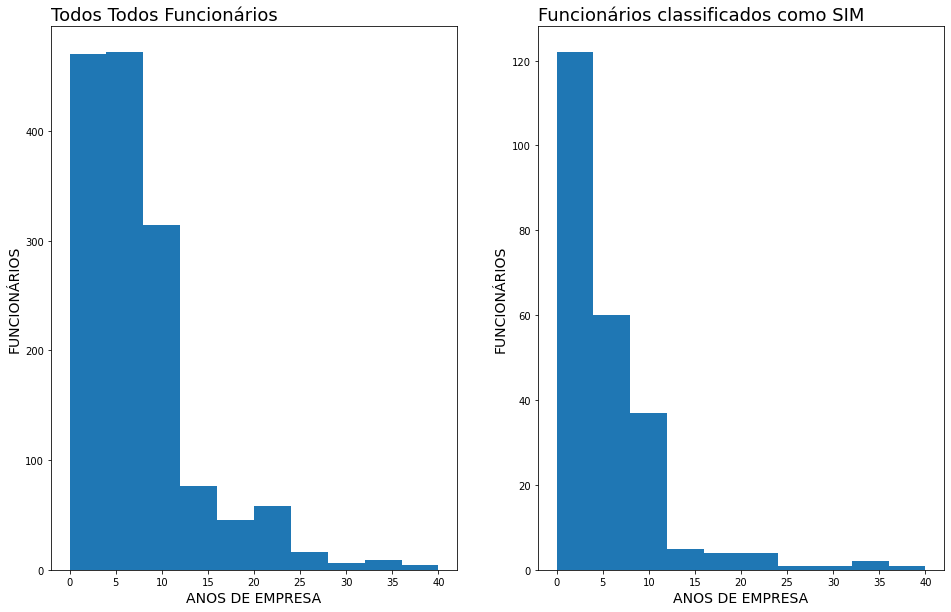

In [ ]:
plt.figure(figsize=(16,10))

plt.subplot(1, 2, 1)
plt.hist(dados['YearsAtCompany'])
plt.title('Todos Todos Funcionários', loc='left', fontsize=18)
plt.xlabel('Anos de Empresa'.upper(), fontsize=14)
plt.ylabel('Funcionários'.upper(), fontsize=14)

plt.subplot(1, 2, 2) 
plt.hist(turnover_sim['YearsAtCompany'])   
plt.title('Funcionários classificados como SIM', loc='left', fontsize=18)
plt.xlabel('Anos de Empresa'.upper(), fontsize=14)
plt.ylabel('Funcionários'.upper(), fontsize=14)
plt.show()

- Através do gráfico histograma conseguimos ver o tempo de empresa dos funcionários, constatamos que proporcionalmente não tem muita relação das pessoas com mais tempo de empresa no quesito de querer ficar ou de querer sair. 

- Também podemos olhar as pessoas que tem os salários mais altos, vamos ver q tipo de relação encontramos.

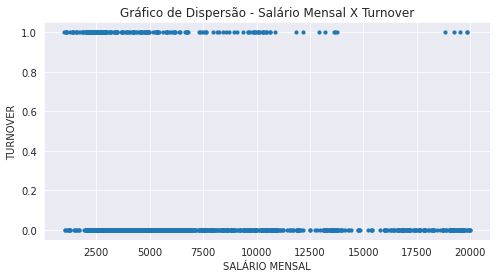

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=[8,4])
plt.scatter(dados['MonthlyIncome'], dados['turnover'],s=10)  
plt.title('Gráfico de Dispersão - Salário Mensal X Turnover', fontsize=12)
plt.xlabel('Salário Mensal'.upper(), fontsize=10)
plt.ylabel('Turnover'.upper(), fontsize=10)
plt.grid(color='white')
plt.show()

- O que já era possível prever, podemos ver no gráfico de dispersão acima que são pouquíssimos os casos de pessoas que ganham um alto salário e pretendem deixar a empresa. A maioria dos casos de pessoas que querem sair da empresa se concentram nos salários abaixo de 10.000 dólares.

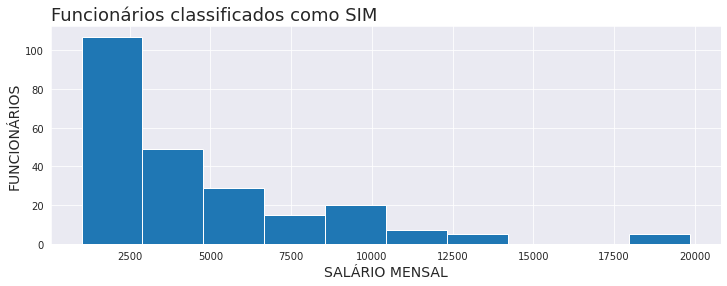

In [ ]:
plt.figure(figsize=(12,4))
plt.hist(turnover_sim['MonthlyIncome'])   
plt.title('Funcionários classificados como SIM', loc='left', fontsize=18)
plt.xlabel('Salário Mensal'.upper(), fontsize=14)
plt.ylabel('Funcionários'.upper(), fontsize=14)
plt.show()

- Aqui outra maneira que visualizar que e maioria se concentra nos salários mais baixos.

- Para continuar nossa análise, vamos olhar agora para o nível de satisfação com o cargo, onde temos 4 níveis, 4 sendo muito satisfeito e 1 sendo pouco satisfeito. 

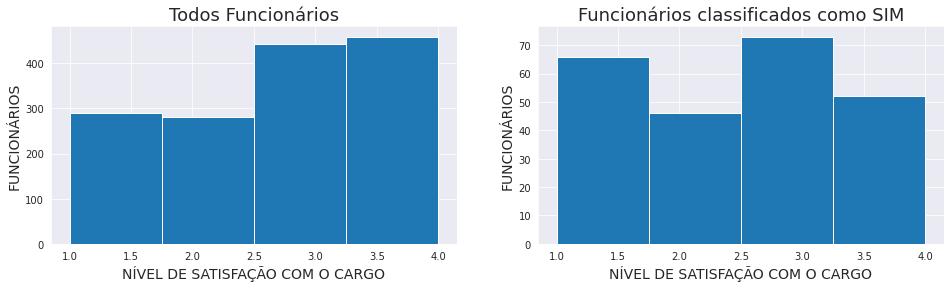

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
plt.hist(dados['JobSatisfaction'], bins =4)   
plt.title('Todos Funcionários', fontsize=18)
plt.xlabel('Nível de Satisfação com o cargo'.upper(), fontsize=14)
plt.ylabel('Funcionários'.upper(), fontsize=14)

plt.subplot(1, 2, 2)
plt.hist(turnover_sim['JobSatisfaction'],bins =4)   
plt.title('Funcionários classificados como SIM', fontsize=18)
plt.xlabel('Nível de Satisfação com o cargo'.upper(), fontsize=14)
plt.ylabel('Funcionários'.upper(), fontsize=14)
plt.show()

- Para nossa surpresa, este foi um indicador que não teve muita relação com o nosso "Turnover", esperávamos que esta relação teria mais impacto numa futura predição. 
- Por incrível que pareça, nos classificados como "sim", a maioria teve o nível de satisfação classificado como "3", o que é considerado que o funcionário esta satisfeito com o seu cargo na empresa.  

- Para continuar nossa análise, vamos olhar os funcionários com os cargos de níveis mais altos para saber se conseguimos perceber uma relação entre estes.

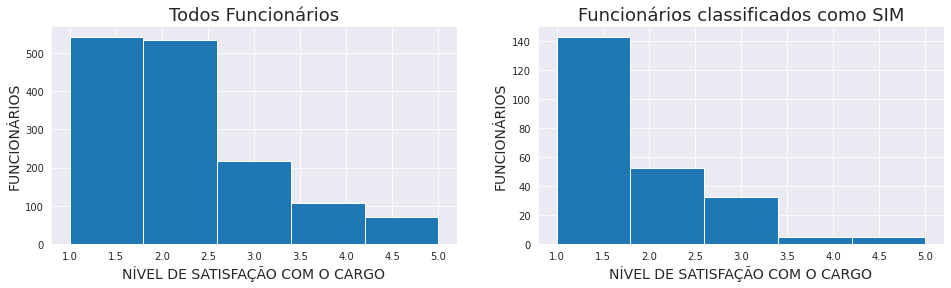

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
plt.hist(dados['JobLevel'],bins =5)   
plt.title('Todos Funcionários', fontsize=18)
plt.xlabel('Nível de Satisfação com o cargo'.upper(), fontsize=14)
plt.ylabel('Funcionários'.upper(), fontsize=14)

plt.subplot(1, 2, 2)
plt.hist(turnover_sim['JobLevel'],bins =5)   
plt.title('Funcionários classificados como SIM', fontsize=18)
plt.xlabel('Nível de Satisfação com o cargo'.upper(), fontsize=14)
plt.ylabel('Funcionários'.upper(), fontsize=14)
plt.show()

E sim, esta vez o esperado se confirmou, os funcionários com os cargos mais altos tendem a não sair da empresa, a grande maioria das pessoas que querem ou de alguma forma demonstraram interesse em não continuar na empresa, estão classificados com nível 1.

#Exercicio 2. (1 ponto)
Faça seleção de características e selecione as 8 variáveis mais importantes. Escreva quais são elas e destaque as variáveis que estão presentes nas ideias apresentadas no exercício 1.

Para escolher e selecionar as 8 variáveis mais importantes vamos usar o método de classificação da RandomForest:

In [ ]:
#sepando o dado em X e y
X = dados.drop(['Attrition','turnover','BusinessTravel','Department','OverTime','MaritalStatus','JobRole','Gender','EducationField'], axis=1)
y = dados['turnover']  

In [ ]:
# Separar o dado em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [ ]:
#usando o método do RandomForest para encontrar a ordem das variaveis mais importantes
rf = RandomForestClassifier(random_state=10, n_estimators=200)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
print(np.argsort(importances)[::-1])

[11  0  1  5  2 19 12  7 22 14 13 10 50  6 51 18 25 20  8 21 23 24  9 16
  3 47 27 41 38 30 35 29 48 34 40 39 32 26 36 37 45 49 15 28 31 42 43 33
 44 46  4 17]


Encontramos as 8 variáveis mais importantes, de acordo com o método usado: 
- MonthlyIncome - renda mensal, valor recebido pelo funcionário
- Age - Idade
- DailyRate - Diárias
- EmployeeNumber - Número do funcionário
- DistanceFromHome - Distância de casa
- TotalWorkingYears - Anos de trabalho
- MonthlyRate - pagamento mensal, valor que a empresa desembolsa para o funcionário
- HourlyRate - valor da hora trabalhada

In [ ]:
X_novo = X.iloc[:,[11,0,1,5,2,19,12,7]]

In [ ]:
X_novo.head()

,MonthlyIncome,Age,DailyRate,EmployeeNumber,DistanceFromHome,TotalWorkingYears,MonthlyRate,HourlyRate
0,5993,41,1102,1,1,8,19479,94
1,5130,49,279,2,8,10,24907,61
2,2090,37,1373,4,2,7,2396,92
3,2909,33,1392,5,3,8,23159,56
4,3468,27,591,7,2,6,16632,40


Analisando as variáveis selecionadas pelo método como as mais importantes, a que mais chama atenção é "EmployeeNumber", pois o que tudo indica esta variável representa o código do funcionário. A hipótese que mais plausível é que este número tem relação com o tempo de trabalho do funcionário na empresa.

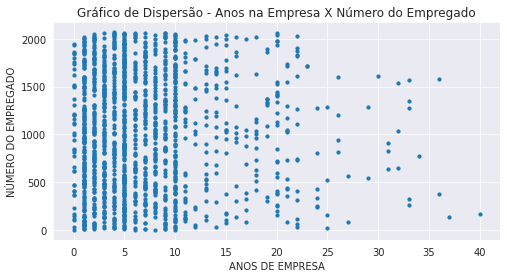

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=[8,4])
plt.scatter(dados['YearsAtCompany'], dados['EmployeeNumber'],s=10)  
plt.title('Gráfico de Dispersão - Anos na Empresa X Número do Empregado', fontsize=12)
plt.xlabel('Anos de Empresa'.upper(), fontsize=10)
plt.ylabel('Número do Empregado'.upper(), fontsize=10)
plt.grid(color='white')
plt.show()

Olhando para o gráfico fica comprovado que a tese levantada anteriormente não faz muito sentido, então tentaremos mais para frente entender melhor esta variável e saber o por que ela esta entre as mais importantes.

#Exercicio 3. (2 pontos)
Construa um modelo de árvore de decisão. Obtenha os valores das métricas: acurácia, precisão e sensitividade.

In [ ]:
# Separar o dado em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_novo, y, test_size = 0.21, random_state=10)

In [ ]:
# Modelo
dt = DecisionTreeClassifier(max_leaf_nodes = 6)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

#métricas
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Precisão:',precision_score(y_test, y_pred, average='macro'))
print('Sensitividade:',recall_score(y_test, y_pred, average='macro'))

Acurácia: 0.8381877022653722
Precisão: 0.8285539963392312
Sensitividade: 0.5749791144527987


Fazendo testes chegamos ao nó máximo de 6, foi onde encontramos o melhor equilíbrio entre as métricas.


Apesar de muitas vezes não termos certeza das variáveis que estamos trabalhando os métodos e modelos nos ajudam a chegar num resultado razoavelmente bom, porém, o indicado é sempre trabalhar com especialistas por perto para facilitar o entendimento.

Exercicio 4. (1 ponto)
Faça a representação da árvore e observe como foi realizado cada ramificação. Explique o que é GINI e quais seriam as desvantagens?

<function matplotlib.pyplot.show>

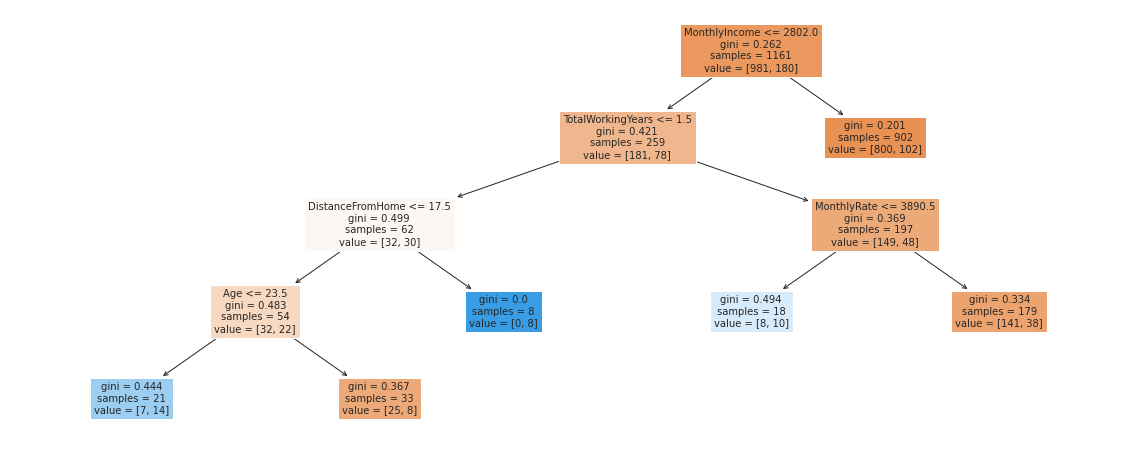

In [ ]:
plt.figure(figsize = [20,8])
names = X_novo.columns
plot_tree(dt,filled=True, fontsize=10, feature_names= names)
plt.show

- Pelo Fato de termos limitado o número de nós, conseguimos plotar uma árvore de fácil visualização, onde podemos olhar todos os nós e compreender as escolhas feitas pelo modelo.
- Neste nosso modelo usamos o critério *defaut*, o índice Gini, que considera divisões binárias para cada atributo. Deve-se examinar todos os possíveis subconjuntos que podem ser formados usando os valores conhecidos de um atributo, para determinar a melhor divisãoo para aquele atributo.
- O índice Gini mede o grau de heterogeneidade dos dados. Logo, pode ser utilizado para medir a impureza de um nó. Quando este índice é igual a zero, o nó é puro. Por outro lado, quando ele se aproxima do valor um, o nó é impuro (aumenta o número de classes uniformemente distribuídas neste nó). 
- Quando, nas árvores de classificação com partições binárias, se utiliza o
critério de Gini tende-se a isolar num ramo os registros que representam a classe mais frequente. Quando se utiliza a entropia, balanceia-se o número de registros em cada ramo. 

#Exercicio 5. (3 pontos)
Chamamos de overfitting (superajuste) a situação onde um modelo "decora" como predizer o conjunto de treino, mas tende a errar muito ao predizer o conjunto de teste. Dizemos que este modelo não generaliza, não consegue lidar com dados novos. Vimos dois modelos de diferentes estrategias de aprendizado por agrupamento durante as aulas. Qual destes modelos tem maior chance de sofrer um overfitting e por quê?

- Os modelos vistos em aula foram os "baggin" e o "boosting", porem o "boosting" é o que tem maiores chances de ocorrer *overfitting*. Esse trabalha com hipóteses sucessivas, tentando melhorar elas a cada hipótese criada, aprendendo com os erros e fazendo com que os mesmos sejam classificados corretamente nas hipóteses seguintes. Com isso o modelo fica muito ajustado aos dados de treino e quando são confrontados com os dados de teste acabam errando muito. Desta maneira ocorre o *overfitting* ao final dos treinamentos.


#Exercicio 6. (1 ponto)
Você recomendaria o seu modelo para uma empresa utilizar em seu setor de Recursos Humanos? Como você explicaria para um setor que não possui conhecimento algum sobre Ciência de Dados que um modelo com 100% de acurácia é impossível de se obter?

Sim, com toda certeza recomendaria, porem com algumas ressalvas, este seria apenas a primeira versão do modelo, poderíamos fazer ajustes específicos no banco de dados para aquela empresa em si, adapta-lo ao seu ambiente. Procurar interessados do setor, alguém com conhecimento, de preferência um especialista para analisarmos juntos possíveis melhorias. Outro ponto importante é explicar que um modelo nunca será 100% perfeito, trabalhamos com inúmeras variáveis e as pessoas muitas vezes são imprevisíveis, com toda a certeza teriamos casos "fora da curva" que deveríamos prestar atenção. Para esses casos, poderia ser criado algum tipo de conversa de tempos em tempos com os funcionários, fazer acompanhamentos, o ideal é criar estratégias que sejam trabalhadas juntamente com o modelo.